# Bank Customers: Leave or Stay - Machine Learning Model

As an analyst at Beta Bank, the job is to analyze behavior data about customers and their termination of contracts with the bank.  

##  Introduction
Presented is an analysis of user behavior data that have terminated their contracts with the bank. 

###  Goal:
This report will focus on developing a model that would predict whether a customer will leave or stay based on various behavior data such as: their credit score, geographical location, Gender, Age, how long they've been with the bank (Tenure), Balance, Number of Products they use, whether they have a credit card, if they are active members, and their Estimated Salary.
The final model will have the highest possible F1 score. The threshold for F1 score is set at 0.59.


### Stages:
This project will consist of the following stages:

1. Introduction
2. General Information
3. Data Preprocessing
    1. Missing values
    2. Drop columns
    3. Dummies values
    4. Scaling
4. Split Dataset
    1. Training
    2. Validation
    3. Test 
5. Model Testing with Class Imbalance
    1. Decision Tree
    2. Random Forest
    3. Logistic Regression
5. Model Improvement
    1. Class weight adjustment
    2. Upsampling/downsampling
6. Final Test
7. Conclusion

## General Information

Import all libraries and modules

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

Let's open the dataset and study it

In [2]:
#import the dataset

bank = pd.read_csv('/datasets/Churn.csv')

#general information

bank.info()

#sample of the data

bank.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


The data consist of the following columns, by separating them into features and target:

**Features**
- `RowNumber` — data string index
- `CustomerId` — unique customer identifier
- `Surname` — surname
- `CreditScore` — credit score
- `Geography` — country of residence
- `Gender` — gender
- `Age` — age
- `Tenure` — period of maturation for a customer’s fixed deposit (years)
- `Balance` — account balance
- `NumOfProducts` — number of banking products used by the customer
- `HasCrCard` — customer has a credit card
- `IsActiveMember` — customer’s activeness
- `EstimatedSalary` — estimated salary

**Target** 

- `Exited` — сustomer has left

Our target will the **'Exited'** column, since the values are 0 and 1, this will be a classification model. 

There are some missing values in the **'tenure'** column, we should address it. 

However, not all of the columns in features are useful, we should exclude **'RowNumber', 'CustomerId', and 'Surname'** columns, as they do not contribute to our model. 

Next, we will need to create some dummies (convert to numerical) for categorical values, such as **'Gender'** and **'Geography'**. 

Lastly, we need to split our dataset into **train, validation and test** sets following a 3:1:1 ratio.


## Data Preprocessing

### Missing values

In [3]:
#check missing values

bank['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

Let's fill those missing values with the median to avoid potential bias.

In [4]:
#fill with median

bank['Tenure'] = bank['Tenure'].fillna(bank['Tenure'].median())

#check

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Drop columns

We will exclude **'RowNumber', 'CustomerId', and 'Surname'** columns, as they do not contribute to our model. 

In [5]:
# New dataset

bank = bank.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

#check

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


### Convert Categorical column to Numerical

We will use One-Hot Encoding (ohe) for this, and we will drop the first column (dummy trap) to avoid excessive columns. 

In [6]:
#One-Hot Encoding

bank_ohe = pd.get_dummies(bank, drop_first = True)

#check

bank_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


We can see that one hot encoding created 3 columns 'Geography_germany', 'Geography_spain' and 'Gender_male'. 

## Spliting the Data

We will split our dataset into **train, validation and test** sets following a 3:1:1 ratio.

In [7]:
#target and feature creation

target = bank_ohe['Exited']
features = bank_ohe.drop(['Exited'],axis = 1)

#split the dataset

features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size = 0.4, random_state = 12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size = 0.5, random_state = 12345)

print(features_train.shape,
     features_valid.shape,
     features_test.shape)

(6000, 11) (2000, 11) (2000, 11)


We have successfully split our data into train, validation and test sets following a 3:1:1 ratio.

## Model Testing with Class Imbalance

In [8]:
#Checking the balance

bank_ohe['Exited'].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

We can see that Exited = 0 is significantly more than Exited = 1. Therefore the class is not balanced. But let's test models with class imbalance and check their F1 and AUC-ROC values. 

We will test 3 different models: Decision Tree, Random Forest, and the Logistic Regression. Since our target is categorical (0, 1). 

### Decision Tree Model

We will need to adjust the hyperparameter: max_depth to decide which will provide the best F1 score & AUC-ROC score. Since we used random_state = 12345 on our dataset split, we will keep this hyperparameter the same. 

In [9]:
#loop through max_depth 1-10.
for depth in range (1,11):
    tree_model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    tree_model.fit(features_train, target_train)
    tree_prediction = tree_model.predict(features_valid)
    prob_valid = tree_model.predict_proba(features_valid)
    prob_1_valid = prob_valid[:,1]
    print('Max depth of', depth, 'F1 Score =', f1_score(target_valid, tree_prediction), 'AUC-ROC score =', roc_auc_score(target_valid, prob_1_valid))
    

Max depth of 1 F1 Score = 0.0 AUC-ROC score = 0.6925565119556736
Max depth of 2 F1 Score = 0.5217391304347825 AUC-ROC score = 0.7501814673449512
Max depth of 3 F1 Score = 0.4234875444839857 AUC-ROC score = 0.7973440741838507
Max depth of 4 F1 Score = 0.5528700906344411 AUC-ROC score = 0.813428129858032
Max depth of 5 F1 Score = 0.5406249999999999 AUC-ROC score = 0.8221680508592478
Max depth of 6 F1 Score = 0.5696969696969697 AUC-ROC score = 0.8164631712023421
Max depth of 7 F1 Score = 0.5320813771517998 AUC-ROC score = 0.8138530658907929
Max depth of 8 F1 Score = 0.5454545454545454 AUC-ROC score = 0.8119854644656693
Max depth of 9 F1 Score = 0.5633802816901409 AUC-ROC score = 0.7801515554775917
Max depth of 10 F1 Score = 0.5413744740532961 AUC-ROC score = 0.766149081472789


We can see that max depth of **6** give a F1 score of ~0.57, AUC-ROC score of ~0.82.

### Random Forest Model

We will need to adjust the hyperparameter: max_depth and n_estimators to decide which will provide the best F1 & AUC_ROC score. Since we used random_state = 12345 on our dataset split, we will keep this hyperparameter the same. 

In [10]:
#create a loop to test max_depth and n_estimators
for depth in range (6,11):
    for est in range (10, 101, 10):
        forest_model = RandomForestClassifier(random_state = 12345, max_depth = depth, n_estimators = est)
        forest_model.fit(features_train, target_train)
        forest_prediction = forest_model.predict(features_valid)
        forst_f1 = f1_score(target_valid, forest_prediction)
        forest_valid = forest_model.predict_proba(features_valid)
        forest_1_valid = forest_valid[:,1]
        print('Max depth of', depth, 'n_estimators=', est, 'F1 Score =', f1_score(target_valid, forest_prediction), 'AUC-ROC score =', roc_auc_score(target_valid, forest_1_valid))

Max depth of 6 n_estimators= 10 F1 Score = 0.5475409836065573 AUC-ROC score = 0.8417075472268765
Max depth of 6 n_estimators= 20 F1 Score = 0.5333333333333333 AUC-ROC score = 0.8490199251144757
Max depth of 6 n_estimators= 30 F1 Score = 0.5306799336650083 AUC-ROC score = 0.8486993328050617
Max depth of 6 n_estimators= 40 F1 Score = 0.53 AUC-ROC score = 0.8504580538232145
Max depth of 6 n_estimators= 50 F1 Score = 0.5348837209302326 AUC-ROC score = 0.8499771653590935
Max depth of 6 n_estimators= 60 F1 Score = 0.5460526315789473 AUC-ROC score = 0.8510833600493591
Max depth of 6 n_estimators= 70 F1 Score = 0.5339966832504146 AUC-ROC score = 0.8505873493064923
Max depth of 6 n_estimators= 80 F1 Score = 0.533112582781457 AUC-ROC score = 0.8512693640779341
Max depth of 6 n_estimators= 90 F1 Score = 0.5257903494176372 AUC-ROC score = 0.8515476140068593
Max depth of 6 n_estimators= 100 F1 Score = 0.5266666666666666 AUC-ROC score = 0.8522371899176744
Max depth of 7 n_estimators= 10 F1 Score = 0

We can see that the best model with max depth of 10, n_estimator = 10 give an F1 score of ~0.59, AUC-ROC score of ~0.85.

### Logistic Regression Model

All we need to do for Logistic Regression is set a solver, we will use the 'liblinear'. and keep the random_state the same.

In [11]:
#Logistic Regression

logistic_model = LogisticRegression(random_state = 12345, solver = 'liblinear')
logistic_model.fit(features_train, target_train)
logistic_prediction = logistic_model.predict(features_valid)
logistic_valid = logistic_model.predict_proba(features_valid)
logistic_1_valid = logistic_valid[:,1]
print('F1 Score =', f1_score(target_valid, logistic_prediction), 'AUC-ROC score =', roc_auc_score(target_valid, logistic_1_valid))

F1 Score = 0.08385744234800838 AUC-ROC score = 0.6727947180904797


Randomforest model with max-depth = 10, n_estimator = 10 gave the highest F1 score (~0.59) follow by decision tree (max_depth of 6), F1 = ~0.57. Logistic Regression Model gave the lowest F1 score (0.33).

## Model Improvement

### Scaling

Since there is no definite range of our numerical columns, it will be best to scale them. 

In [12]:
#scaling

numerical = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

scaler.fit(features_train[numerical])

features_train[numerical] = scaler.transform(features_train[numerical])
features_valid[numerical] = scaler.transform(features_valid[numerical])
features_test[numerical] = scaler.transform(features_test[numerical])

print(features_train.head())
print(features_valid.head())
print(features_test.head())

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
7479    -0.886751 -0.373192  1.082277  1.232271      -0.891560          1   
3411     0.608663 -0.183385  1.082277  0.600563      -0.891560          0   
6027     2.052152  0.480939 -0.737696  1.027098       0.830152          0   
1247    -1.457915 -1.417129  0.354288 -1.233163       0.830152          1   
3716     0.130961 -1.132419 -1.101690  1.140475      -0.891560          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
7479               0        -0.187705                  0                1   
3411               0        -0.333945                  0                0   
6027               1         1.503095                  1                0   
1247               0        -1.071061                  0                0   
3716               0         1.524268                  1                0   

      Gender_Male  
7479            1  
3411            0  
6027          

/tmp/ipykernel_31/3890043125.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numerical] = scaler.transform(features_train[numerical])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_31/3890043125.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Those numerical columns should be properly scaled now. 

### Class Weight adjustment

We will start by adjusting the class weight in the hyperparameter. Since we saw that RandomForest gave the highest F1, let's improve on this model.

In [13]:
#improve model by adjusting class weight

adj_forest_model = RandomForestClassifier(random_state = 12345, max_depth = 10, n_estimators=10, class_weight = 'balanced')
adj_forest_model.fit(features_train, target_train)
adj_forest_pred = adj_forest_model.predict(features_valid)
adj_forest_valid = adj_forest_model.predict_proba(features_valid)
adj_forest_1_valid = adj_forest_valid[:,1]
print('F1 Score =', f1_score(target_valid, adj_forest_pred), 'AUC-ROC score =', roc_auc_score(target_valid, adj_forest_1_valid))

F1 Score = 0.6038647342995168 AUC-ROC score = 0.8378377560957906


We can see that our F1 score has improved, but AUC-ROC decreased due to the True Positive Rate decreased.

### Upsampling/Downsampling

Since we do not know which method gives the best result, let's try them both.

In [14]:
#def a function for upsampling

def upsample(features, target, repeat):
    
    #split samples into negative and positive observations
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target == 0]
    target_one = target[target == 1]
    
    #duplicate positive class and combine with negative class
    features_upsampled = pd.concat([features_zero] + [features_one] * repeat)
    target_upsampled = pd.concat([target_zero] + [target_one] * repeat)
    
    #shuffle data
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state = 12345)
    
    #return the upsampled target and feature
    return features_upsampled, target_upsampled

In [15]:
#test the data

for i in range(1, 6): 
    features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, i)
    model = RandomForestClassifier(random_state = 12345, max_depth = 10, n_estimators = 10)
    model.fit(features_train_upsampled, target_train_upsampled)
    prediction_valid = model.predict(features_valid)
    print('Upsampling with', i, 'repeats:\n''F1 Score =', f1_score(target_valid, prediction_valid))

Upsampling with 1 repeats:
F1 Score = 0.5635528330781011
Upsampling with 2 repeats:
F1 Score = 0.6274007682458387
Upsampling with 3 repeats:
F1 Score = 0.5986238532110092
Upsampling with 4 repeats:
F1 Score = 0.5849462365591399
Upsampling with 5 repeats:
F1 Score = 0.6012396694214877


As we can see, upsampling with 2 repeats gave us the best F1 score, F1 = ~0.62. Now let's see what downsampling can do for us.

In [16]:
#define a function for downsampling


def downsample(features, target, fraction):
    
    #split samples into negative and positive observations
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target == 0]
    target_one = target[target == 1]
    
    #take fractions of negative class and combine with positive class
    features_downsampled = pd.concat([features_zero.sample(frac=fraction, random_state =12345)] + [features_one])
    target_downsampled = pd.concat([target_zero.sample(frac=fraction, random_state = 12345)] + [target_one])
    
    #shuffle data
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state = 12345)
    
    #return the upsampled target and feature
    return features_downsampled, target_downsampled

In [17]:
#test the data

for i in np.arange(0.1, 1.0, 0.1): 
    features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, i)
    model = RandomForestClassifier(random_state = 12345, max_depth = 10, n_estimators = 10)
    model.fit(features_train_downsampled, target_train_downsampled)
    prediction_valid = model.predict(features_valid)
    print('downsampling with fraction of', i, ':\n''F1 Score =', f1_score(target_valid, prediction_valid))

downsampling with fraction of 0.1 :
F1 Score = 0.45058317986494784
downsampling with fraction of 0.2 :
F1 Score = 0.5595854922279794
downsampling with fraction of 0.30000000000000004 :
F1 Score = 0.5938775510204082
downsampling with fraction of 0.4 :
F1 Score = 0.6255707762557078
downsampling with fraction of 0.5 :
F1 Score = 0.6134663341645886
downsampling with fraction of 0.6 :
F1 Score = 0.6271870794078062
downsampling with fraction of 0.7000000000000001 :
F1 Score = 0.5963431786216596
downsampling with fraction of 0.8 :
F1 Score = 0.5872093023255813
downsampling with fraction of 0.9 :
F1 Score = 0.575301204819277


It appeared that downsampling with fraction of 0.6 gave us the best f1 score (~0.63). 

Let's try to combine both up & down sampling methods to see whether this will give us even higher F1 score.

In [18]:
#define a function that will do both up and down sampling.

def setsample(features, target, fraction, repeat):
    
    #split samples into negative and positive observations
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target == 0]
    target_one = target[target == 1]
    
    #take fractions of negative class and combine with positive class * repeat
    features_sampled = pd.concat([features_zero.sample(frac=fraction, random_state =12345)] + [features_one] * repeat)
    target_sampled = pd.concat([target_zero.sample(frac=fraction, random_state = 12345)] + [target_one] * repeat)
    
    #shuffle data
    features_sampled, target_sampled = shuffle(features_sampled, target_sampled, random_state = 12345)
    
    #return the upsampled target and feature
    return features_sampled, target_sampled
    
   

In [19]:
#test

for fraction in np.arange(0.1, 1.0, 0.1):
    for i in range (1, 6):
        features_train_sampled, target_train_sampled = setsample(features_train, target_train, fraction, i)
        model = RandomForestClassifier(random_state = 12345, max_depth = 10, n_estimators = 10)
        model.fit(features_train_sampled, target_train_sampled)
        prediction_valid = model.predict(features_valid)
        print('fraction =', fraction, 'repeat =', i, 'F1 Score =', f1_score(target_valid, prediction_valid))

fraction = 0.1 repeat = 1 F1 Score = 0.45058317986494784
fraction = 0.1 repeat = 2 F1 Score = 0.4296619411123228
fraction = 0.1 repeat = 3 F1 Score = 0.40346408558329094
fraction = 0.1 repeat = 4 F1 Score = 0.4001991040318566
fraction = 0.1 repeat = 5 F1 Score = 0.40383644623927306
fraction = 0.2 repeat = 1 F1 Score = 0.5595854922279794
fraction = 0.2 repeat = 2 F1 Score = 0.49348869088416725
fraction = 0.2 repeat = 3 F1 Score = 0.46840148698884765
fraction = 0.2 repeat = 4 F1 Score = 0.4564564564564565
fraction = 0.2 repeat = 5 F1 Score = 0.4317425083240843
fraction = 0.30000000000000004 repeat = 1 F1 Score = 0.5938775510204082
fraction = 0.30000000000000004 repeat = 2 F1 Score = 0.5339805825242719
fraction = 0.30000000000000004 repeat = 3 F1 Score = 0.5075921908893709
fraction = 0.30000000000000004 repeat = 4 F1 Score = 0.48823133826496307
fraction = 0.30000000000000004 repeat = 5 F1 Score = 0.47912652536929995
fraction = 0.4 repeat = 1 F1 Score = 0.6255707762557078
fraction = 0.4 re

By combining both up-and down-sampling did not really give us a better result. Fraction of 0.6, repeat = 1 still resulted in the highest F1 score (~0.63).

In [20]:
#what if we combined both methods (class balance and up/down sampling) together

features_train_sampled, target_train_sampled = setsample(features_train, target_train, 0.6, 1)
model = RandomForestClassifier(random_state = 12345, max_depth = 10, n_estimators = 10, class_weight = 'balanced')
model.fit(features_train_sampled, target_train_sampled)
prediction_valid = model.predict(features_valid)
print('F1 Score =', f1_score(target_valid, prediction_valid))

F1 Score = 0.6139534883720931


It appeared that using the combination of fraction of 0.6, and repeat of 1 will grant us the highest F1 score (~0.63).

## Final Test

In [21]:
# Let's first combined the train and valid set.

features = pd.concat([features_train, features_valid])
target = pd.concat([target_train, target_valid])

# Test our model
features_sampled, target_sampled = setsample(features, target, 0.6, 1)
model = RandomForestClassifier(random_state = 12345, max_depth = 10, n_estimators = 10, class_weight='balanced')
model.fit(features_sampled, target_sampled)
prediction_valid = model.predict(features_test)
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
print('F1 Score =', f1_score(target_test, prediction_valid))
print('AUC-ROC Score =', roc_auc_score(target_test, probabilities_one_valid))

F1 Score = 0.5973451327433629
AUC-ROC Score = 0.835636686349729


By using both up/downsampling and balancing the class weight, we acheived ~0.6 for our final F1 score. Our AUC-ROC score became ~0.84, showing good separation.

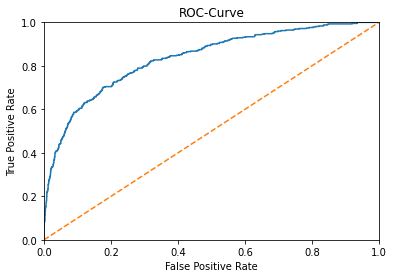

In [22]:
# to visualize

fpr, tpr, threshold = roc_curve(target_test, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.show()

## Conclusion

We processed the dataset by first scaling numeric columns, then we fill in missing values, and finally set dummy columns from categorical columns. 

We then split the data into train, valid, and test sets following a 3:1:1 ratio. 

Although we saw an approximate 4:1 class imbalance, we trained Decision Tree, Random Forest, and Logistic Regression Classifier models with class imblanced. Random Forest appeared to be the best model with the highest f1 score (about 0.59) and AUC-ROC value of ~0.85. 

We then took the class imbalance into consideration and used to two approaches to address: Class weight adjustment and a combination of up and down sampling. We trained our final model with the combination of both methods, the F1 score for our final model on test set is ~0.6, whihle AUC-ROC is ~0.84.